In [1]:
! pip install arch
! pip install PythonTsa


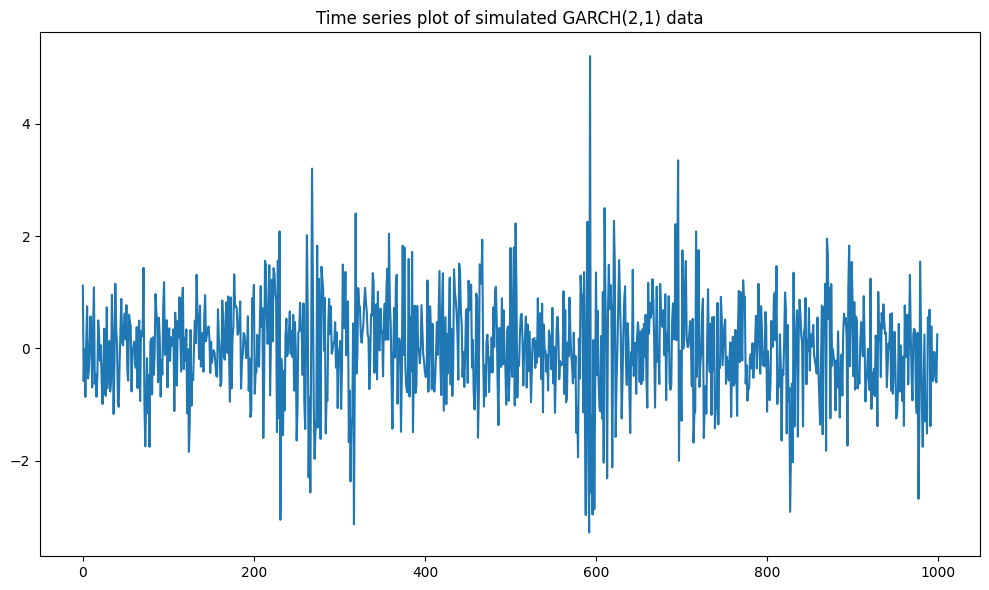

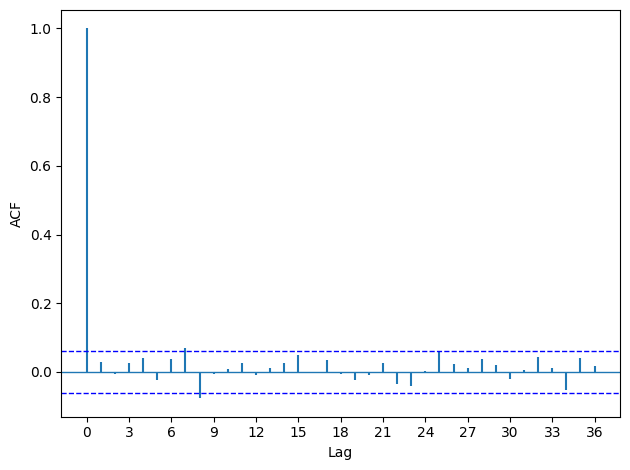

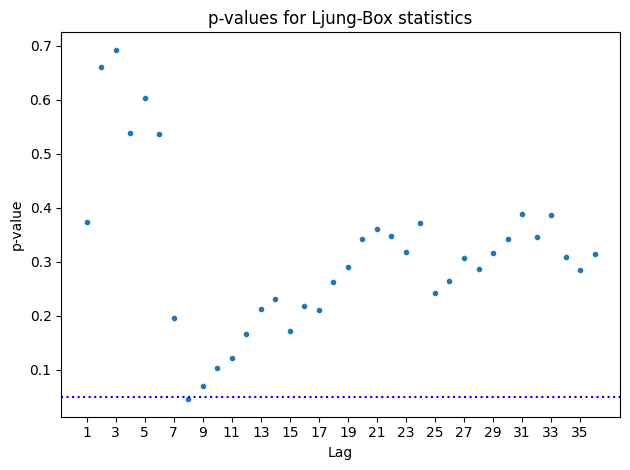

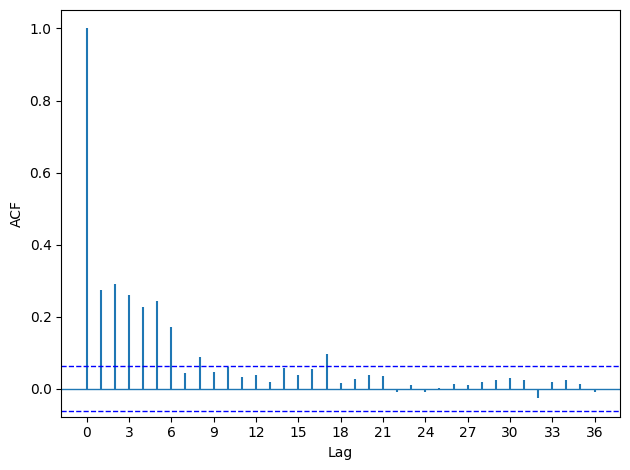

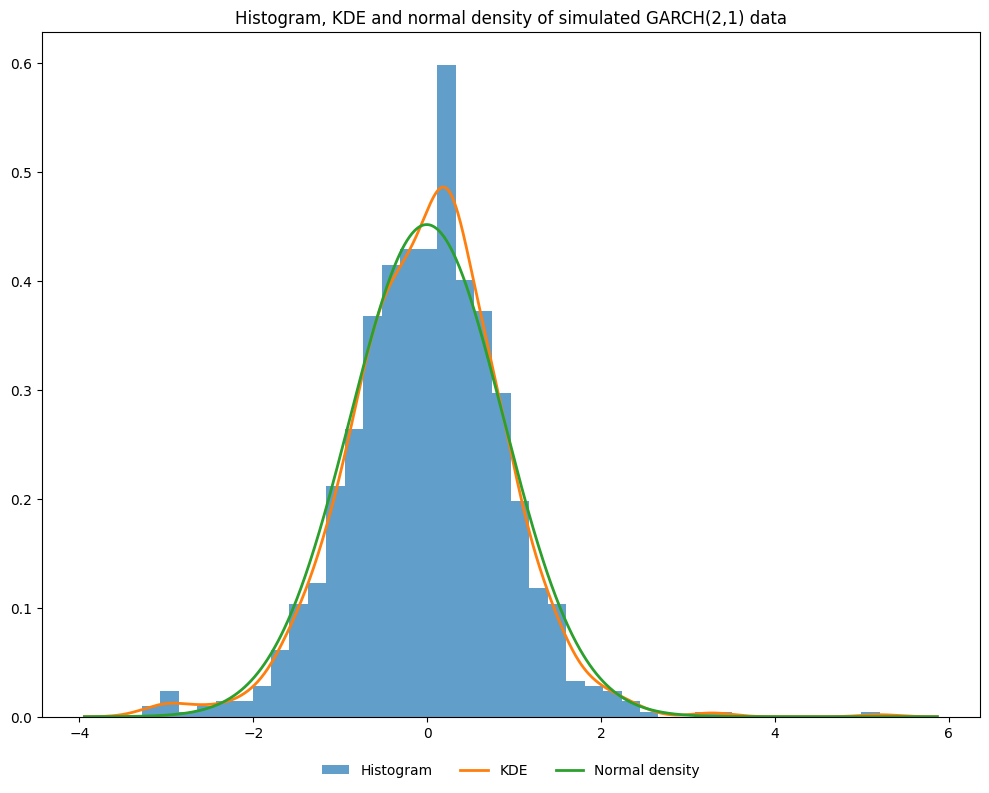

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   data   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1204.87
Distribution:                  Normal   AIC:                           2417.74
Method:            Maximum Likelihood   BIC:                           2437.37
                                        No. Observations:                 1000
Date:                Wed, Jun 11 2025   Df Residuals:                     1000
Time:                        13:35:24   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1118  2.194e-02      5.094  3.499e-07 [6.877e-0

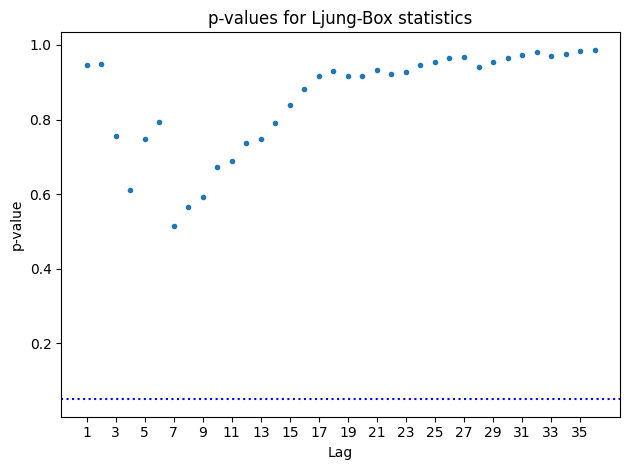

GARCH model analysis completed!

Saved PNG files:
- timeseries_Prob63.png: Time series plot
- acf_Prob63.png: ACF plot of original data
- ljungbox_Prob63.png: Ljung-Box p-values for original data
- acf_squared_Prob63.png: ACF plot of squared data
- distribution_Prob63.png: Histogram, KDE and normal density
- residuals_ljungbox_Prob63.png: Ljung-Box p-values for residuals


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from arch.univariate import arch_model
from scipy.stats import norm
from PythonTsa.plot_acf_pacf import acf_pacf_fig
from PythonTsa.LjungBoxtest import plot_LB_pvalue

# Note: You need to install PythonTsa package first
# pip install PythonTsa

# Configure matplotlib for high-quality transparent plots
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'none'
plt.rcParams['savefig.facecolor'] = 'none'
plt.rcParams['savefig.transparent'] = True

# Create GARCH(2,1) model for simulation
sim_garchmod = arch_model(None, p=2, q=1)

# Define parameters: mu, omega, alpha[1], alpha[2], beta[1]
params = pd.Series([0, 0.1, 0.2, 0.1, 0.6],
                   index=['mu', 'omega', 'alpha[1]', 'alpha[2]', 'beta[1]'])

# Simulate data from GARCH(2,1) process
sim_data = sim_garchmod.simulate(params, nobs=1000)
simdata = sim_data['data']

# Plot the simulated time series
plt.figure(figsize=(10, 6))
simdata.plot()
plt.title('Time series plot of simulated GARCH(2,1) data')
plt.tight_layout()
plt.savefig('timeseries_Prob63.png', transparent=True, format='png', bbox_inches='tight', dpi=300)
plt.show()

# ACF plot of the simulated data using PythonTsa
acf_pacf_fig(simdata, both=False, lag=36)
plt.tight_layout()
plt.savefig('acf_Prob63.png', transparent=True, format='png', bbox_inches='tight', dpi=300)
plt.show()

# Ljung-Box test p-values plot using PythonTsa
plot_LB_pvalue(simdata, noestimatedcoef=0, nolags=36)
plt.tight_layout()
plt.savefig('ljungbox_Prob63.png', transparent=True, format='png', bbox_inches='tight', dpi=300)
plt.show()

# Note: Not always generate a white noise series in simulation.
# If the simulated sample is not white noise, it needs to be reproduced.

# ACF plot of squared data using PythonTsa
acf_pacf_fig(simdata**2, both=False, lag=36)
plt.tight_layout()
plt.savefig('acf_squared_Prob63.png', transparent=True, format='png', bbox_inches='tight', dpi=300)
plt.show()

# Histogram, KDE and normal density comparison
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# Histogram
hfig = ax.hist(simdata, bins=40, density=True, label='Histogram', alpha=0.7)

# KDE
kde = sm.nonparametric.KDEUnivariate(simdata)
kde.fit()
ax.plot(kde.support, kde.density, label='KDE', linewidth=2)

# Normal density for comparison
smean = np.mean(simdata)
scal = np.std(simdata, ddof=1)
normden = norm.pdf(kde.support, loc=smean, scale=scal)
ax.plot(kde.support, normden, label='Normal density', linewidth=2)

# Configure legend: transparent, outside, bottom
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3,
                  framealpha=0, fancybox=False, shadow=False)
legend.get_frame().set_facecolor('none')

plt.title('Histogram, KDE and normal density of simulated GARCH(2,1) data')
plt.tight_layout()
plt.savefig('distribution_Prob63.png', transparent=True, format='png', bbox_inches='tight', dpi=300)
plt.show()

# Fit GARCH(2,1) model to the simulated data
garchmod = arch_model(simdata, p=2, q=1, mean='Zero').fit(disp='off')
print(garchmod.summary())

# Analyze residuals
garchresid = garchmod.std_resid

# Ljung-Box test on squared standardized residuals using PythonTsa
plot_LB_pvalue(garchresid**2, noestimatedcoef=0, nolags=36)
plt.tight_layout()
plt.savefig('residuals_ljungbox_Prob63.png', transparent=True, format='png', bbox_inches='tight', dpi=300)
plt.show()

print("GARCH model analysis completed!")
print("\nSaved PNG files:")
print("- timeseries_Prob63.png: Time series plot")
print("- acf_Prob63.png: ACF plot of original data")
print("- ljungbox_Prob63.png: Ljung-Box p-values for original data")
print("- acf_squared_Prob63.png: ACF plot of squared data")
print("- distribution_Prob63.png: Histogram, KDE and normal density")
print("- residuals_ljungbox_Prob63.png: Ljung-Box p-values for residuals")

# Required packages:
# pip install numpy pandas statsmodels matplotlib arch scipy PythonTsa